In [ ]:
from google.colab import drive
import os

# 1. Drive'ı bağla
drive.mount('/content/drive')

# 2. Senin klasör yolun (Ekran görüntüsüne göre)
project_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject'

# Klasör yoksa oluştur (Garanti olsun)
if not os.path.exists(project_path):
    os.makedirs(project_path)
    print(f"Klasör oluşturuldu: {project_path}")

# 3. Çalışma dizinini bu klasör yap
os.chdir(project_path)

print(f"✅ Şu anki çalışma dizini: {os.getcwd()}")
print("Dosyalar artık buraya kaydedilecek.")

Mounted at /content/drive
✅ Şu anki çalışma dizini: /content/drive/MyDrive/Colab Notebooks/deepfakevideoproject
Dosyalar artık buraya kaydedilecek.


In [ ]:
import os
import shutil
import random
from google.colab import drive

# 1. kütüphaneyi yükle
!pip install -q kagglehub

import kagglehub

# 2. Drive Bağlantısı
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 3. Kimlik Bilgileri (Senin verdiğin key)
os.environ['KAGGLE_USERNAME'] = "edavural"
os.environ['KAGGLE_KEY'] = "b3adb182d7e279bbbaa152724aa76746"

# --- HEDEF AYARLARI ---
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject'
DATASET_NAME = "Mini_Dataset"
TOPLAM_VIDEO = 150 # Her sınıf için
TEST_ORANI = 0.2

# Hedef yol
target_path = os.path.join(DRIVE_PROJECT_PATH, DATASET_NAME)

if os.path.exists(target_path):
    print(f"✅ '{DATASET_NAME}' Drive'da zaten var! İşlem iptal ediliyor.")
else:
    print("🚀 Kagglehub ile indirme başlatılıyor...")

    # 4. İNDİRME (Colab Cache'ine iner)
    try:
        # Bu fonksiyon veriyi indirir ve indiği yerin yolunu (path) döndürür
        download_path = kagglehub.dataset_download("reubensuju/celeb-df-v2")
        print(f"📦 İndirme tamamlandı! Dosyalar şurada: {download_path}")

        # 5. AYIKLAMA VE DRIVE'A TAŞIMA
        print("⚙️ Dosyalar seçilip Drive'a taşınıyor...")

        # Kaynak klasörleri bul (Bazen iç içe klasör olabiliyor, onu bulalım)
        source_real = os.path.join(download_path, "Celeb-real")
        source_fake = os.path.join(download_path, "Celeb-synthesis")

        # Eğer direkt orada yoksa bir alt klasöre bakalım
        if not os.path.exists(source_real):
             # Olası alt klasör isimleri
             for root, dirs, files in os.walk(download_path):
                if "Celeb-real" in dirs:
                    source_real = os.path.join(root, "Celeb-real")
                    source_fake = os.path.join(root, "Celeb-synthesis")
                    break

        print(f"   Kaynak Real: {source_real}")
        print(f"   Kaynak Fake: {source_fake}")

        # Drive'da klasörleri oluştur
        for split in ["Train", "Test"]:
            for cat in ["Real", "Fake"]:
                os.makedirs(f"{target_path}/{split}/{cat}", exist_ok=True)

        # Videoları Listele
        real_videos = [f for f in os.listdir(source_real) if f.endswith('.mp4')]
        fake_videos = [f for f in os.listdir(source_fake) if f.endswith('.mp4')]

        random.shuffle(real_videos)
        random.shuffle(fake_videos)

        # Taşıma Fonksiyonu
        def copy_to_drive(files, src_folder, category_name):
            # Limit
            limit = min(len(files), TOPLAM_VIDEO)
            selected = files[:limit]

            # Test/Train ayrımı
            test_count = int(limit * TEST_ORANI)
            train_count = limit - test_count

            # Kopyalama
            # Train
            for f in selected[:train_count]:
                shutil.copy(os.path.join(src_folder, f), f"{target_path}/Train/{category_name}/{f}")
            # Test
            for f in selected[train_count:]:
                shutil.copy(os.path.join(src_folder, f), f"{target_path}/Test/{category_name}/{f}")

            print(f"✅ {category_name} tamamlandı: {train_count} Train, {test_count} Test kopyalandı.")

        # İşlemi yap
        copy_to_drive(real_videos, source_real, "Real")
        copy_to_drive(fake_videos, source_fake, "Fake")

        print(f"\n🎉 HARİKA! Veri seti Drive'ına başarıyla kuruldu: \n{target_path}")

    except Exception as e:
        print(f"❌ Bir hata oluştu: {e}")

✅ 'Mini_Dataset' Drive'da zaten var! İşlem iptal ediliyor.


In [ ]:
import os
import random
from IPython.display import HTML
from base64 import b64encode

# Yollar
base_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Mini_Dataset/Train'
real_path = os.path.join(base_path, 'Real')
fake_path = os.path.join(base_path, 'Fake')

# Fonksiyon: Videoyu base64 formatına çevirir (HTML içinde oynatmak için)
def get_video_html(folder_path):
    if not os.path.exists(folder_path):
        return None, "Klasör Bulunamadı"

    files = [f for f in os.listdir(folder_path) if f.endswith('.mp4')]
    if not files:
        return None, "Video Yok"

    # Rastgele seç
    video_name = random.choice(files)
    full_path = os.path.join(folder_path, video_name)

    mp4 = open(full_path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return data_url, video_name

print("🎥 Videolar hazırlanıyor (Biraz zaman alabilir)...")

# Videoları al
real_url, real_name = get_video_html(real_path)
fake_url, fake_name = get_video_html(fake_path)

# HTML Tablo ile yan yana göster
html_content = f"""
<div style="display: flex; justify-content: center; gap: 20px;">
    <div style="text-align: center;">
        <h3 style="color: green;">✅ GERÇEK (Real)</h3>
        <p style="font-size: 12px;">{real_name}</p>
        <video width="320" height="240" controls>
            <source src="{real_url}" type="video/mp4">
        </video>
    </div>

    <div style="text-align: center;">
        <h3 style="color: red;">❌ SAHTE (Fake/Deepfake)</h3>
        <p style="font-size: 12px;">{fake_name}</p>
        <video width="320" height="240" controls>
            <source src="{fake_url}" type="video/mp4">
        </video>
    </div>
</div>
"""

display(HTML(html_content))

🎥 Videolar hazırlanıyor (Biraz zaman alabilir)...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.6 MB/s eta 0:00:00


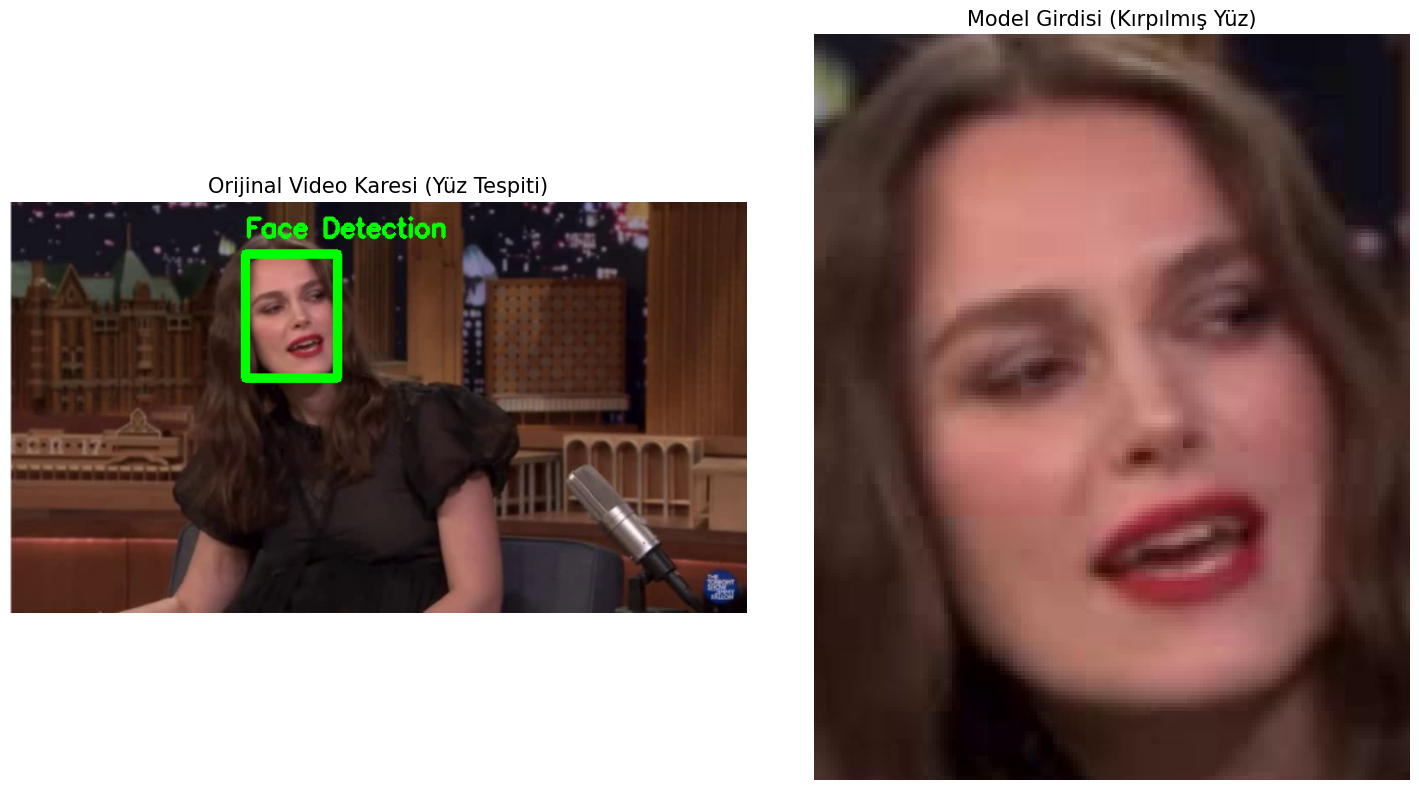

✅ Afiş görseli başarıyla oluşturuldu!
Dosya şurada: /content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/poster_preprocessing_ornek.png
Bilgisayarına indirmek için soldaki dosya ikonundan drive > MyDrive > ... yolunu takip edebilirsin.


In [ ]:
# 1. ÖNCE KÜTÜPHANEYİ YÜKLE (Bu satır hatayı çözer)
!pip install mtcnn

# 2. Sonra işlemleri yap
import cv2
import os
import random
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Ayarlar
INPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Mini_Dataset/Train/Real'
OUTPUT_PATH = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/poster_preprocessing_ornek.png'

# Dedektörü başlat
detector = MTCNN()

# Rastgele bir video seç
if not os.path.exists(INPUT_DIR):
    print(f"❌ HATA: Klasör bulunamadı: {INPUT_DIR}")
else:
    video_files = [f for f in os.listdir(INPUT_DIR) if f.endswith('.mp4')]

    if len(video_files) == 0:
        print("❌ HATA: Klasörde video yok!")
    else:
        random_video = random.choice(video_files)
        cap = cv2.VideoCapture(os.path.join(INPUT_DIR, random_video))

        # Videodan bir kare yakala (Orta kısımlardan olsun)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)
        ret, frame = cap.read()
        cap.release()

        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(frame_rgb)

            if faces:
                # En büyük yüzü bul
                faces = sorted(faces, key=lambda x: x['box'][2]*x['box'][3], reverse=True)
                x, y, w, h = faces[0]['box']

                # 1. Görsel: Orijinal Kare üzerine Kutu Çizme
                img_with_box = frame_rgb.copy()
                cv2.rectangle(img_with_box, (x, y), (x+w, y+h), (0, 255, 0), 10) # Yeşil kalın çerçeve
                cv2.putText(img_with_box, 'Face Detection', (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

                # 2. Görsel: Sadece Yüzü Kırpma (Cropped)
                margin = 20
                x1, y1 = max(0, x-margin), max(0, y-margin)
                x2, y2 = min(frame_rgb.shape[1], x+w+margin), min(frame_rgb.shape[0], y+h+margin)
                face_crop = frame_rgb[y1:y2, x1:x2]

                # Yan yana çiz ve kaydet
                fig, axes = plt.subplots(1, 2, figsize=(15, 8))

                axes[0].imshow(img_with_box)
                axes[0].set_title("Orijinal Video Karesi (Yüz Tespiti)", fontsize=15)
                axes[0].axis('off')

                axes[1].imshow(face_crop)
                axes[1].set_title("Model Girdisi (Kırpılmış Yüz)", fontsize=15)
                axes[1].axis('off')

                plt.tight_layout()
                plt.savefig(OUTPUT_PATH, dpi=300) # Yüksek kalite kaydet
                plt.show()

                print(f"✅ Afiş görseli başarıyla oluşturuldu!\nDosya şurada: {OUTPUT_PATH}")
                print("Bilgisayarına indirmek için soldaki dosya ikonundan drive > MyDrive > ... yolunu takip edebilirsin.")
            else:
                print("❌ Bu karede yüz bulunamadı, kodu tekrar çalıştırarak başka bir video dene.")
        else:
            print("❌ Video okunamadı.")

In [ ]:
import cv2
import os
from mtcnn import MTCNN
from tqdm import tqdm

# --- AYARLAR ---
INPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Mini_Dataset'
OUTPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Processed_Dataset'

IMG_SIZE = 224         # ResNext modeli için standart boyut
MAX_FRAMES = 20        # Her videodan max 20 kare (GitHub projesindeki LSTM mantığına uygun)
FRAME_SKIP = 5         # Videonun tamamını taramak için atlayarak git

detector = MTCNN()

def process_all_videos():
    print("⏳ Büyük Yüz Kırpma İşlemi Başlıyor...")

    for split in ['Train', 'Test']:
        for label in ['Real', 'Fake']:
            source_path = os.path.join(INPUT_DIR, split, label)
            target_path = os.path.join(OUTPUT_DIR, split, label)

            os.makedirs(target_path, exist_ok=True)
            videos = [v for v in os.listdir(source_path) if v.endswith('.mp4')]

            print(f"\n📂 İşleniyor: {split}/{label} -> {len(videos)} Video")

            for video in tqdm(videos):
                video_name = video.split('.')[0]
                save_folder = os.path.join(target_path, video_name)

                # Zaten yapılmışsa atla (Devam edebilirlik için)
                if os.path.exists(save_folder) and len(os.listdir(save_folder)) >= 5:
                    continue

                os.makedirs(save_folder, exist_ok=True)

                cap = cv2.VideoCapture(os.path.join(source_path, video))
                saved_count = 0
                frame_idx = 0

                while cap.isOpened() and saved_count < MAX_FRAMES:
                    ret, frame = cap.read()
                    if not ret: break

                    frame_idx += 1
                    if frame_idx % FRAME_SKIP != 0: continue

                    try:
                        # MTCNN renk dönüşümü ister
                        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        faces = detector.detect_faces(frame_rgb)

                        if faces:
                            # En büyük yüzü al
                            faces = sorted(faces, key=lambda x: x['box'][2]*x['box'][3], reverse=True)
                            x, y, w, h = faces[0]['box']

                            margin = 20
                            x1, y1 = max(0, x-margin), max(0, y-margin)
                            x2, y2 = min(frame.shape[1], x+w+margin), min(frame.shape[0], y+h+margin)

                            face_img = frame[y1:y2, x1:x2] # BGR formatında kaydet (OpenCV standardı)
                            face_resized = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))

                            cv2.imwrite(os.path.join(save_folder, f"frame_{saved_count}.jpg"), face_resized)
                            saved_count += 1
                    except:
                        continue
                cap.release()

process_all_videos()
print("\n✅✅ TÜM İŞLEMLER BİTTİ! Veri seti modele girmeye hazır.")

⏳ Büyük Yüz Kırpma İşlemi Başlıyor...

📂 İşleniyor: Train/Real -> 120 Video


100%|██████████| 120/120 [00:28<00:00,  4.27it/s]



📂 İşleniyor: Train/Fake -> 120 Video


100%|██████████| 120/120 [00:26<00:00,  4.46it/s]



📂 İşleniyor: Test/Real -> 30 Video


100%|██████████| 30/30 [00:06<00:00,  4.53it/s]



📂 İşleniyor: Test/Fake -> 30 Video


100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


✅✅ TÜM İŞLEMLER BİTTİ! Veri seti modele girmeye hazır.


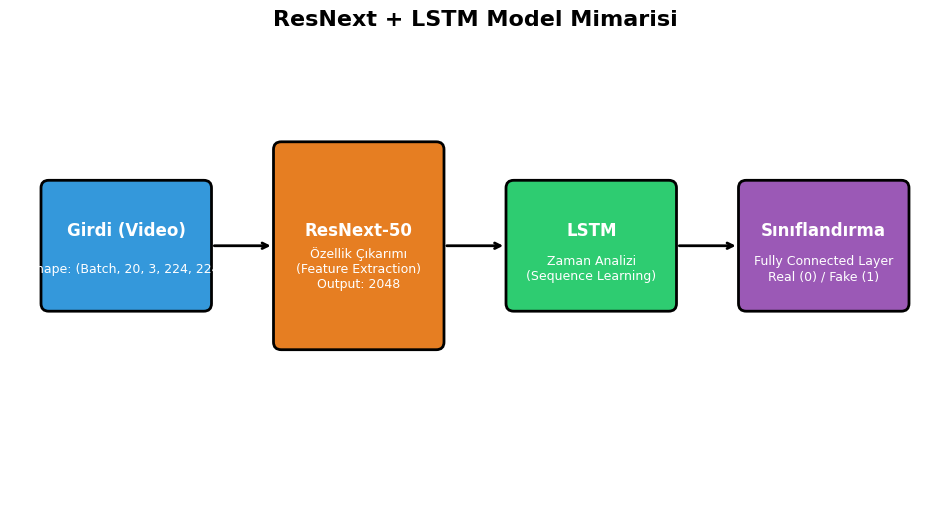

✅ ÖZET ŞEMA OLUŞTURULDU!
Dosya şurada: /content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/model_ozet_sema.png


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Şema Ayarları
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)
ax.axis('off')

# Kutucuk Çizme Fonksiyonu
def draw_box(x, y, width, height, color, text, subtext=""):
    # Kutu
    rect = patches.FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1",
                                  edgecolor="black", facecolor=color, linewidth=2)
    ax.add_patch(rect)
    # Yazı
    ax.text(x + width/2, y + height/2 + 0.2, text, ha='center', va='center', fontsize=12, fontweight='bold', color='white')
    ax.text(x + width/2, y + height/2 - 0.3, subtext, ha='center', va='center', fontsize=9, color='white')

# Ok Çizme Fonksiyonu
def draw_arrow(x_start, y_start, x_end, y_end):
    ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", lw=2, color="black"))

# --- KUTULAR (MİMARİ AKIŞI) ---

# 1. Girdi
draw_box(0.5, 2.5, 2, 1.5, "#3498db", "Girdi (Video)", "Shape: (Batch, 20, 3, 224, 224)")

# Ok
draw_arrow(2.6, 3.25, 3.4, 3.25)

# 2. ResNext-50 (CNN)
draw_box(3.5, 2.0, 2, 2.5, "#e67e22", "ResNext-50", "Özellik Çıkarımı\n(Feature Extraction)\nOutput: 2048")

# Ok
draw_arrow(5.6, 3.25, 6.4, 3.25)

# 3. LSTM (RNN)
draw_box(6.5, 2.5, 2, 1.5, "#2ecc71", "LSTM", "Zaman Analizi\n(Sequence Learning)")

# Ok
draw_arrow(8.6, 3.25, 9.4, 3.25)

# 4. Çıktı (Sınıflandırma)
draw_box(9.5, 2.5, 2, 1.5, "#9b59b6", "Sınıflandırma", "Fully Connected Layer\nReal (0) / Fake (1)")

# Başlık
plt.title("ResNext + LSTM Model Mimarisi", fontsize=16, fontweight='bold')

# Kaydet
save_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/model_ozet_sema.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ ÖZET ŞEMA OLUŞTURULDU!\nDosya şurada: {save_path}")

🚀 Eğitim Cihazı: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🧠 Model GPU hafızasına yüklendi.
⏳ Veri seti yükleniyor...
✅ Hazır! Eğitim Seti: 240 video | Test Seti: 60 video

🔥 EĞİTİM BAŞLIYOR! Arkanıza yaslanın...
Epoch [1/5], Adım [10/60], Loss: 0.8676
Epoch [1/5], Adım [20/60], Loss: 0.5768
Epoch [1/5], Adım [30/60], Loss: 0.5776
Epoch [1/5], Adım [40/60], Loss: 0.4285
Epoch [1/5], Adım [50/60], Loss: 0.8893
Epoch [1/5], Adım [60/60], Loss: 0.7509
------------------------------------------------------------
🌟 EPOCH 1 TAMAMLANDI -> Ortalama Hata (Loss): 0.6438 | Doğruluk: %62.92
------------------------------------------------------------
Epoch [2/5], Adım [10/60], Loss: 0.5900
Epoch [2/5], Adım [20/60], Loss: 0.6028
Epoch [2/5], Adım [30/60], Loss: 0.5453
Epoch [2/5], Adım [40/60], Loss: 0.3043
Epoch [2/5], Adım [50/60], Loss: 0.2337
Epoch [2/5], Adım [60/60], Loss: 0.3397
------------------------------------------------------------
🌟 EPOCH 2 TAMAMLANDI -> Ortalama Hata (Loss): 0.4928 | Doğruluk: %77.92
---------------------------------------

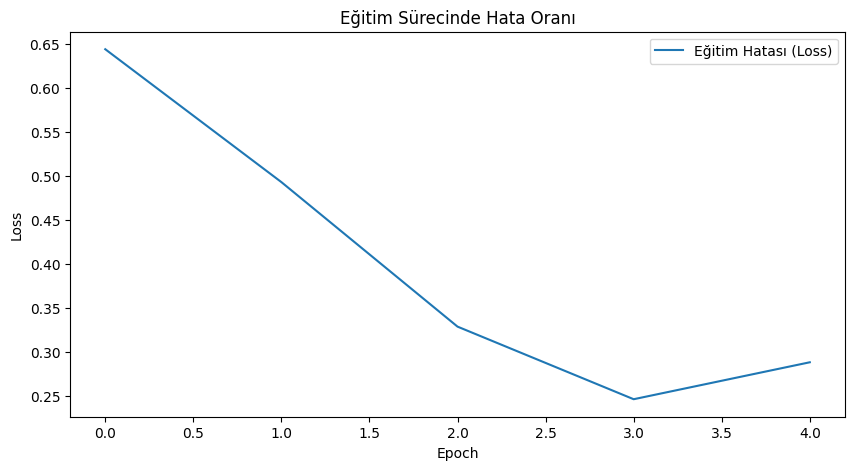

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# 1. GPU AYARLAMASI
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Eğitim Cihazı: {device}")
if str(device) == 'cpu':
    print("⚠️ UYARI: GPU aktif değil! Eğitim çok yavaş olur. Runtime ayarlarını kontrol et.")

# ---------------------------------------------------------
# 2. MODEL MİMARİSİ (ResNext + LSTM)
# ---------------------------------------------------------
class ResNextLSTM(nn.Module):
    def __init__(self, num_classes=2, hidden_dim=256, num_layers=2):
        super(ResNextLSTM, self).__init__()
        # ResNext-50 (Görüntü Özellikleri)
        base_model = models.resnext50_32x4d(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.input_dim = 2048

        # LSTM (Zaman Özellikleri)
        self.lstm = nn.LSTM(input_size=self.input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)

        # Sınıflandırıcı
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        c_in = x.view(batch_size * seq_len, c, h, w)

        features = self.feature_extractor(c_in)
        features = features.view(batch_size, seq_len, -1)

        lstm_out, (h_n, c_n) = self.lstm(features)
        final_feature = lstm_out[:, -1, :]

        out = self.fc(final_feature)
        return out

# Modeli Kur
model = ResNextLSTM().to(device)
print("🧠 Model GPU hafızasına yüklendi.")

# ---------------------------------------------------------
# 3. VERİ YÜKLEYİCİ SINIF (DATASET CLASS)
# ---------------------------------------------------------
class DeepfakeDataset(Dataset):
    def __init__(self, root_dir, split="Train", max_frames=20, transform=None):
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.max_frames = max_frames
        self.video_paths = []
        self.labels = []

        # Real (0) ve Fake (1) klasörlerini tara
        classes = ["Real", "Fake"]
        for label, class_name in enumerate(classes):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.exists(class_dir):
                videos = os.listdir(class_dir)
                for vid in videos:
                    vid_path = os.path.join(class_dir, vid)
                    # Boş klasörleri alma
                    if os.path.isdir(vid_path) and len(os.listdir(vid_path)) > 0:
                        self.video_paths.append(vid_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]

        # Frame'leri sıralı oku (frame_0.jpg, frame_1.jpg...)
        # Dosya ismindeki numaraya göre sıralamak önemli!
        frames = sorted(glob.glob(os.path.join(video_path, "*.jpg")),
                       key=lambda x: int(os.path.basename(x).split("_")[1].split(".")[0]))

        # LSTM için kare sayısı sabit olmalı (max_frames)
        if len(frames) > self.max_frames:
            frames = frames[:self.max_frames]
        elif len(frames) < self.max_frames:
            # Eksik kare varsa son kareyi kopyalayarak doldur (Padding)
            padding = [frames[-1]] * (self.max_frames - len(frames))
            frames.extend(padding)

        images = []
        for frame_path in frames:
            try:
                img = Image.open(frame_path).convert('RGB')
                if self.transform:
                    img = self.transform(img)
                images.append(img)
            except:
                pass # Bozuk resim varsa atla

        # Eğer bir hata olduysa ve hiç resim yüklenmediyse (çok nadir) boş tensor döndürmemek için kontrol
        if len(images) == 0:
            images = [torch.zeros(3, 224, 224) for _ in range(self.max_frames)]

        return torch.stack(images), torch.tensor(label, dtype=torch.long)

# ---------------------------------------------------------
# 4. HAZIRLIK VE EĞİTİM (TRAINING LOOP)
# ---------------------------------------------------------
# Ayarlar
dataset_root = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Processed_Dataset'
BATCH_SIZE = 4      # Colab T4 GPU'su için ideal
EPOCHS = 5          # 5 Tur döneceğiz
LR = 0.0001         # Öğrenme hızı (Hassas ayar)

# Resim Dönüşümleri (Normalize etme)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("⏳ Veri seti yükleniyor...")
train_dataset = DeepfakeDataset(dataset_root, split="Train", transform=transform)
test_dataset = DeepfakeDataset(dataset_root, split="Test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"✅ Hazır! Eğitim Seti: {len(train_dataset)} video | Test Seti: {len(test_dataset)} video")

# Loss ve Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Kayıtlar (Grafik çizmek için)
train_losses = []
train_accs = []

print("\n🔥 EĞİTİM BAŞLIYOR! Arkanıza yaslanın...")
print("="*60)

for epoch in range(EPOCHS):
    model.train() # Eğitim modu
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # 1. Gradyanları sıfırla
        optimizer.zero_grad()

        # 2. İleri Yayılım (Tahmin et)
        outputs = model(inputs)

        # 3. Hatayı Hesapla ve Geri Yay (Öğren)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # İstatistikler
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # İlerleme Çubuğu (Log)
        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Adım [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Epoch Sonu Hesaplamaları
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    print("-" * 60)
    print(f"🌟 EPOCH {epoch+1} TAMAMLANDI -> Ortalama Hata (Loss): {epoch_loss:.4f} | Doğruluk: %{epoch_acc:.2f}")
    print("-" * 60)

print("✅ EĞİTİM BİTTİ!")

# Modeli Kaydet
save_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/final_model.pth'
torch.save(model.state_dict(), save_path)
print(f"💾 Model kaydedildi: {save_path}")

# Başarı Grafiğini Çiz ve Kaydet
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Eğitim Hatası (Loss)')
plt.title("Eğitim Sürecinde Hata Oranı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/loss_graph.png')
print("📊 Loss grafiği kaydedildi: loss_graph.png")

⏳ Eğitilmiş model yükleniyor...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Model başarıyla yüklendi!
🚀 Test başlıyor... (60 video analiz edilecek)


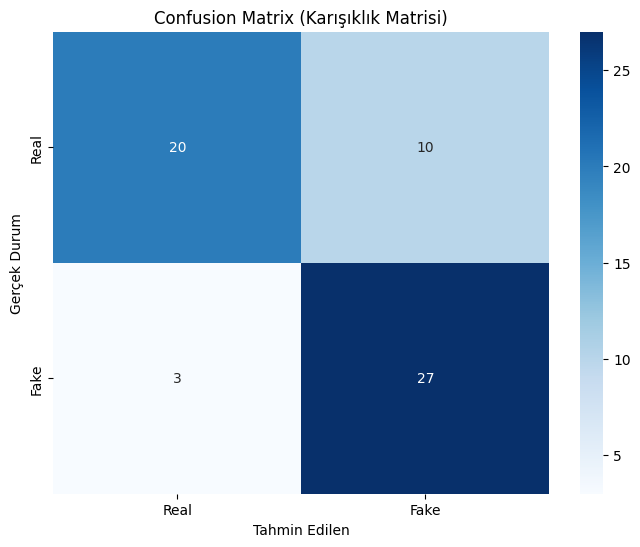


📊 DETAYLI TEST RAPORU
              precision    recall  f1-score   support

        Real       0.87      0.67      0.75        30
        Fake       0.73      0.90      0.81        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60

------------------------------
🏆 FİNAL TEST DOĞRULUĞU (Accuracy): %78.33
✅ Confusion Matrix şuraya kaydedildi: confusion_matrix.png


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. AYARLAR
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_root = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Processed_Dataset'
BATCH_SIZE = 4

# 2. MODELİ TEKRAR TANIMLA (Yüklemek için)
class ResNextLSTM(nn.Module):
    def __init__(self, num_classes=2, hidden_dim=256, num_layers=2):
        super(ResNextLSTM, self).__init__()
        base_model = models.resnext50_32x4d(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.input_dim = 2048
        self.lstm = nn.LSTM(input_size=self.input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        c_in = x.view(batch_size * seq_len, c, h, w)
        features = self.feature_extractor(c_in)
        features = features.view(batch_size, seq_len, -1)
        lstm_out, (h_n, c_n) = self.lstm(features)
        final_feature = lstm_out[:, -1, :]
        out = self.fc(final_feature)
        return out

# 3. KAYDEDİLEN MODELİ YÜKLE
print("⏳ Eğitilmiş model yükleniyor...")
model = ResNextLSTM().to(device)
model_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/final_model.pth'

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path, map_location=device))
    print("✅ Model başarıyla yüklendi!")
else:
    print("❌ Model dosyası bulunamadı! Lütfen önce eğitimi tamamlayın.")

# 4. TEST VERİ SETİNİ HAZIRLA
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class DeepfakeDataset(Dataset):
    def __init__(self, root_dir, split="Test", max_frames=20, transform=None): # Dikkat: Split='Test'
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.max_frames = max_frames
        self.video_paths = []
        self.labels = []

        classes = ["Real", "Fake"]
        for label, class_name in enumerate(classes):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.exists(class_dir):
                videos = os.listdir(class_dir)
                for vid in videos:
                    vid_path = os.path.join(class_dir, vid)
                    if os.path.isdir(vid_path) and len(os.listdir(vid_path)) > 0:
                        self.video_paths.append(vid_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]
        frames = sorted(glob.glob(os.path.join(video_path, "*.jpg")),
                       key=lambda x: int(os.path.basename(x).split("_")[1].split(".")[0]))
        if len(frames) > self.max_frames:
            frames = frames[:self.max_frames]
        elif len(frames) < self.max_frames:
            padding = [frames[-1]] * (self.max_frames - len(frames))
            frames.extend(padding)

        images = []
        for frame_path in frames:
            try:
                img = Image.open(frame_path).convert('RGB')
                if self.transform:
                    img = self.transform(img)
                images.append(img)
            except: pass
        if len(images) == 0: images = [torch.zeros(3, 224, 224) for _ in range(self.max_frames)]
        return torch.stack(images), torch.tensor(label, dtype=torch.long)

test_dataset = DeepfakeDataset(dataset_root, split="Test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 5. TESTİ BAŞLAT
print(f"🚀 Test başlıyor... ({len(test_dataset)} video analiz edilecek)")
model.eval() # Test modu (öğrenme kapalı)

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 6. SONUÇLARI GÖRSELLEŞTİR (CONFUSION MATRIX)
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.title('Confusion Matrix (Karışıklık Matrisi)')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/confusion_matrix.png')
plt.show()

# 7. RAPORU YAZDIR
print("\n" + "="*50)
print("📊 DETAYLI TEST RAPORU")
print("="*50)
print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))
print("-" * 30)
acc = accuracy_score(all_labels, all_preds)
print(f"🏆 FİNAL TEST DOĞRULUĞU (Accuracy): %{acc*100:.2f}")
print("="*50)
print("✅ Confusion Matrix şuraya kaydedildi: confusion_matrix.png")

In [ ]:
import torch
import cv2
import os
import shutil
import random
import numpy as np
from torchvision import transforms
from PIL import Image
from mtcnn import MTCNN

# --- AYARLAR ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Mini_Dataset/Test'
output_folder = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Sunum_Videolari'
model_path = '/content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/final_model.pth'

# Hedef klasörü temizle ve oluştur
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.makedirs(output_folder)

# --- MODELİ VE ARAÇLARI YÜKLE ---
print("⏳ Sistem hazırlanıyor...")

# Model Mimarisi (Aynısı)
class ResNextLSTM(torch.nn.Module):
    def __init__(self, num_classes=2, hidden_dim=256, num_layers=2):
        super(ResNextLSTM, self).__init__()
        import torchvision.models as models
        base_model = models.resnext50_32x4d(pretrained=True)
        self.feature_extractor = torch.nn.Sequential(*list(base_model.children())[:-1])
        self.input_dim = 2048
        self.lstm = torch.nn.LSTM(input_size=self.input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        c_in = x.view(batch_size * seq_len, c, h, w)
        features = self.feature_extractor(c_in)
        features = features.view(batch_size, seq_len, -1)
        lstm_out, (h_n, c_n) = self.lstm(features)
        final_feature = lstm_out[:, -1, :]
        out = self.fc(final_feature)
        return out

model = ResNextLSTM().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

detector = MTCNN()

# --- VİDEO TAHMİN FONKSİYONU ---
def predict_single_video(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0

    while cap.isOpened() and len(frames) < max_frames:
        ret, frame = cap.read()
        if not ret: break

        frame_count += 1
        if frame_count % 5 != 0: continue # Hız için atla

        try:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(frame_rgb)
            if faces:
                x, y, w, h = faces[0]['box']
                # Güvenlik payı
                x, y = max(0, x-10), max(0, y-10)
                face_img = frame_rgb[y:y+h+20, x:x+w+20] # Kırp

                pil_img = Image.fromarray(face_img)
                img_tensor = transform(pil_img)
                frames.append(img_tensor)
        except: pass
    cap.release()

    if len(frames) == 0: return None # Yüz bulunamadı

    # Padding (Eksikleri tamamla)
    if len(frames) < max_frames:
        frames.extend([frames[-1]] * (max_frames - len(frames)))

    # Modelden Geçir
    inputs = torch.stack(frames).unsqueeze(0).to(device) # Batch boyutu ekle
    with torch.no_grad():
        outputs = model(inputs)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

    confidence = probs[0][preds.item()].item() * 100
    return "Fake" if preds.item() == 1 else "Real", confidence

# --- DEMO DÖNGÜSÜ ---
print("\n🚀 CANLI DEMO VE KAYIT BAŞLIYOR...")
print(f"Videolar şuraya kaydedilecek: {output_folder}")
print("-" * 50)

categories = {'Real': 'Real', 'Fake': 'Fake'}
saved_count = 0

for folder_name, true_label in categories.items():
    folder_path = os.path.join(dataset_path, folder_name)
    videos = [v for v in os.listdir(folder_path) if v.endswith('.mp4')]

    # Her kategoriden rastgele 5'er video seçip test edelim
    selected_videos = random.sample(videos, min(len(videos), 5))

    for vid_name in selected_videos:
        full_path = os.path.join(folder_path, vid_name)

        # Tahmin Et
        prediction, confidence = predict_single_video(full_path)

        if prediction is None:
            continue # Yüz bulamadıysa geç

        # Sonucu Yazdır
        icon = "✅" if prediction == true_label else "❌"
        print(f"{icon} Video: {vid_name}")
        print(f"   Gerçek: {true_label} | Tahmin: {prediction} (Güven: %{confidence:.2f})")

        # Dosyayı Kaydet (İsimlendirerek)
        # Örnek Dosya Adı: TAHMIN_Fake_GERCEK_Fake_id0123.mp4
        new_name = f"DURUM_{'DOGRU' if prediction == true_label else 'YANLIS'}_Tahmin_{prediction}_Gercek_{true_label}_{vid_name}"
        shutil.copy(full_path, os.path.join(output_folder, new_name))
        saved_count += 1

print("-" * 50)
print(f"🎉 İŞLEM TAMAM! Toplam {saved_count} adet video etiketlenip kaydedildi.")
print(f"Klasöre git: {output_folder}")
print("Bu videoları indirip sunumunda oynatabilirsin.")

⏳ Sistem hazırlanıyor...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🚀 CANLI DEMO VE KAYIT BAŞLIYOR...
Videolar şuraya kaydedilecek: /content/drive/MyDrive/Colab Notebooks/deepfakevideoproject/Sunum_Videolari
--------------------------------------------------
✅ Video: id30_0007.mp4
   Gerçek: Real | Tahmin: Real (Güven: %87.61)
✅ Video: id13_0004.mp4
   Gerçek: Real | Tahmin: Real (Güven: %96.40)
✅ Video: id39_0007.mp4
   Gerçek: Real | Tahmin: Real (Güven: %70.56)
❌ Video: id53_0006.mp4
   Gerçek: Real | Tahmin: Fake (Güven: %72.05)
✅ Video: id51_0002.mp4
   Gerçek: Real | Tahmin: Real (Güven: %88.37)
✅ Video: id42_id45_0002.mp4
   Gerçek: Fake | Tahmin: Fake (Güven: %95.21)
❌ Video: id23_id21_0006.mp4
   Gerçek: Fake | Tahmin: Real (Güven: %67.07)
❌ Video: id28_id29_0002.mp4
   Gerçek: Fake | Tahmin: Real (Güven: %56.22)
✅ Video: id32_id21_0008.mp4
   Gerçek: Fake | Tahmin: Fake (Güven: %88.38)
✅ Video: id23_id20_0009.mp4
   Gerçek: Fake | Tahmin: Fake (Güven: %90.67)
--------------------------------------------------
🎉 İŞLEM TAMAM! Toplam 10 adet vi

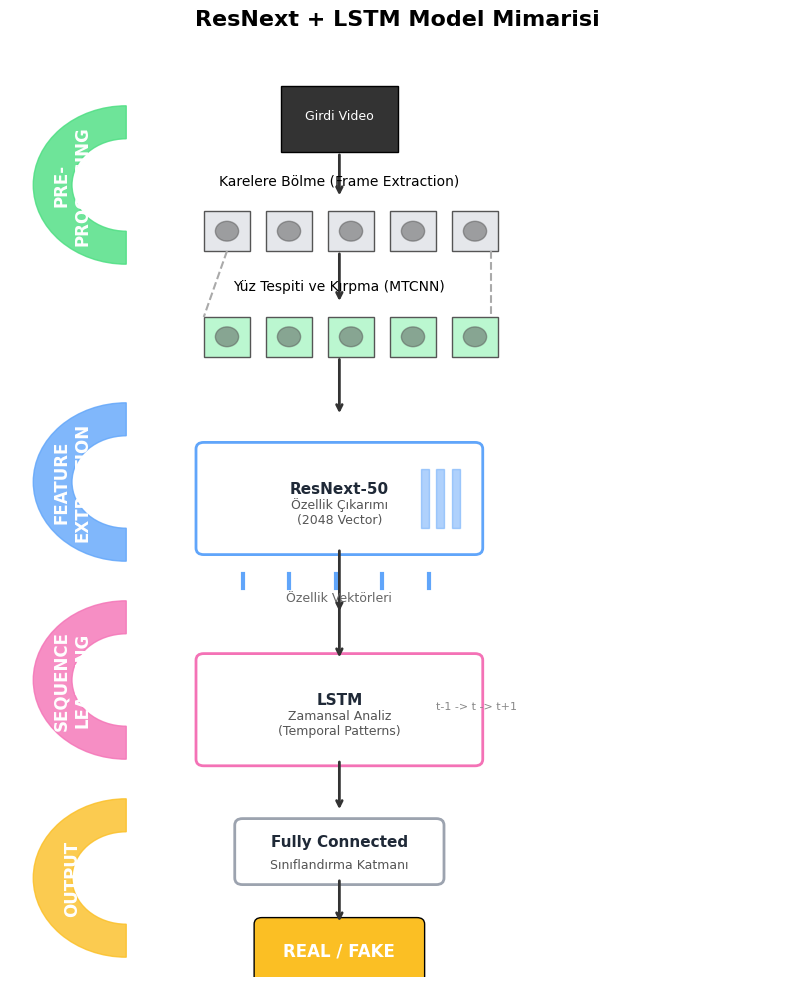

✅ Görsel oluşturuldu: mimari_diyagrami_final.png


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

# Şema Ayarları
fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

# Renk Paleti (Akademik Tonlar)
c_prep = "#4ade80"   # Yeşil (Preprocessing)
c_model = "#60a5fa"  # Mavi (Feature Extraction)
c_lstm = "#f472b6"   # Pembe (Sequence Learning)
c_out = "#fbbf24"    # Sarı (Output)
c_text = "#1f2937"   # Koyu Gri Yazı

# --- FONKSİYONLAR ---
def draw_stage_label(y_center, text, color):
    # Sol taraftaki yarım daire etiketler
    wedge = patches.Wedge((1.5, y_center), 1.2, 90, 270, width=0.5, color=color, alpha=0.8)
    ax.add_patch(wedge)
    ax.text(0.8, y_center, text, ha='center', va='center', rotation=90,
            fontsize=12, fontweight='bold', color='white')

def draw_box(x, y, w, h, color, text, subtext=""):
    # Dikdörtgen Kutu
    rect = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                                  edgecolor=color, facecolor="white", linewidth=2)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2 + 0.15, text, ha='center', va='center', fontsize=11, fontweight='bold', color=c_text)
    ax.text(x + w/2, y + h/2 - 0.2, subtext, ha='center', va='center', fontsize=9, color="#555")

def draw_arrow(x, y_start, y_end):
    ax.annotate("", xy=(x, y_end), xytext=(x, y_start),
                arrowprops=dict(arrowstyle="->", lw=2, color="#333"))

def draw_frames(x_start, y, count=5, color="#ccc"):
    # Küçük kareler (Frame temsili)
    for i in range(count):
        rect = patches.Rectangle((x_start + i*0.8, y), 0.6, 0.6, edgecolor="#555", facecolor=color)
        ax.add_patch(rect)
        # İçine sembolik yüz
        circle = patches.Circle((x_start + i*0.8 + 0.3, y + 0.3), 0.15, color="#555", alpha=0.5)
        ax.add_patch(circle)

# --- 1. PREPROCESSING KISMI ---
draw_stage_label(12, "PRE-\nPROCESSING", c_prep)

# Video İkonu
video_rect = patches.Rectangle((3.5, 12.5), 1.5, 1, facecolor="#333", edgecolor="black")
ax.add_patch(video_rect)
ax.text(4.25, 13, "Girdi Video", color="white", ha="center", fontsize=9)
draw_arrow(4.25, 12.5, 11.8)

# Karelere Bölme
ax.text(4.25, 12, "Karelere Bölme (Frame Extraction)", ha="center", fontsize=10)
draw_frames(2.5, 11.0, count=5, color="#e5e7eb") # Gri Kareler

draw_arrow(4.25, 11.0, 10.2)

# Yüz Tespiti ve Kırpma
ax.text(4.25, 10.4, "Yüz Tespiti ve Kırpma (MTCNN)", ha="center", fontsize=10)
draw_frames(2.5, 9.4, count=5, color="#bbf7d0") # Yeşil (Kırpılmış) Kareler
# Zoom efekti çizgileri
ax.plot([2.8, 2.5], [11.0, 10.0], color="#aaa", linestyle="--")
ax.plot([6.2, 6.2], [11.0, 10.0], color="#aaa", linestyle="--")

draw_arrow(4.25, 9.4, 8.5)

# --- 2. MODEL (ResNext) KISMI ---
draw_stage_label(7.5, "FEATURE\nEXTRACTION", c_model)

# ResNext Kutusu
draw_box(2.5, 6.5, 3.5, 1.5, c_model, "ResNext-50", "Özellik Çıkarımı\n(2048 Vector)")

# ResNext'in içinin temsili (Katmanlar)
for i in range(3):
    r = patches.Rectangle((5.3 + i*0.2, 6.8), 0.1, 0.9, color=c_model, alpha=0.5)
    ax.add_patch(r)

draw_arrow(4.25, 6.5, 5.5)

# --- 3. SEQUENCE LEARNING (LSTM) KISMI ---
draw_stage_label(4.5, "SEQUENCE\nLEARNING", c_lstm)

# Vektör Temsili
ax.text(4.25, 5.7, "Özellik Vektörleri", ha="center", fontsize=9, color="#666")
for i in range(5):
    ax.plot([3.0 + i*0.6, 3.0 + i*0.6], [5.9, 6.1], lw=3, color=c_model)

draw_arrow(4.25, 5.7, 4.8)

# LSTM Kutusu
draw_box(2.5, 3.3, 3.5, 1.5, c_lstm, "LSTM", "Zamansal Analiz\n(Temporal Patterns)")

# LSTM Hücre Temsili
ax.text(5.5, 4.05, "t-1 -> t -> t+1", fontsize=8, color="#888")

draw_arrow(4.25, 3.3, 2.5)

# --- 4. CLASSIFICATION KISMI ---
draw_stage_label(1.5, "OUTPUT", c_out)

# Fully Connected
draw_box(3.0, 1.5, 2.5, 0.8, "#9ca3af", "Fully Connected", "Sınıflandırma Katmanı")

draw_arrow(4.25, 1.5, 0.8)

# Sonuç Kutusu
result_box = patches.FancyBboxPatch((3.25, 0.0), 2.0, 0.8, boxstyle="round,pad=0.1",
                                    facecolor=c_out, edgecolor="black")
ax.add_patch(result_box)
ax.text(4.25, 0.4, "REAL / FAKE", ha='center', va='center', fontsize=12, fontweight='bold', color="white")

# Başlık
plt.title("ResNext + LSTM Model Mimarisi", fontsize=16, fontweight='bold', pad=20)

# Kaydet
save_path = 'mimari_diyagrami_final.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Görsel oluşturuldu: {save_path}")